In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading the Data

In [3]:
urlTrain = "HousingData_LinearRegression.csv"
df = pd.read_csv(urlTrain)

In [4]:
df.head()

,Size,Bedrooms,Price(USD)
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Use standard deviation for normalization

In [5]:
dfNorm=pd.DataFrame(((df-df.mean())/df.std()))
#df.apply(lambda x: (x - DataFrame.mean(x)) / (DataFrame.std(x)))
dfNorm.insert(0, 'Ones', 1)
dfNorm.head()

,Ones,Size,Bedrooms,Price(USD)
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


1. After you've added the intercept term, define X as the features in the dataframe. Define Y as the target variable.
2. Convert them to a numpy array and define beta(the coeffecients) with zeros.

In [6]:
column = dfNorm.shape[1]
X = dfNorm.iloc[:,0:column-1]
Y = dfNorm.iloc[:,column-1:column]
#Y = dfNorm['Price(USD)']
#X = dfNorm.drop('Price(USD)', axis = 1)

In [7]:
print(X.head())

   Ones      Size  Bedrooms
0     1  0.130010 -0.223675
1     1 -0.504190 -0.223675
2     1  0.502476 -0.223675
3     1 -0.735723 -1.537767
4     1  1.257476  1.090417


In [8]:
print(Y.head())

   Price(USD)
0    0.475747
1   -0.084074
2    0.228626
3   -0.867025
4    1.595389


In [9]:
XMatrix = np.matrix(X.values)  
YMatrix = np.matrix(Y.values)

In [11]:
m, n = np.shape(XMatrix)
print(m , n)

47 3


Initilize the beta values to zeroes

In [12]:
beta = np.zeros(n)

In [14]:
temp = np.matrix(np.zeros(beta.shape))
print(temp)
print(beta[0])
#parameters = int(beta.ravel().shape[1])
#print parameters

[[0. 0. 0.]]
0.0


Since we now have every module to calculate our cost function, we'll go ahead and define it.

In [15]:
def costFunction(X, Y, beta):
    '''
    Compute the Least Square Cost Function.
    Return the calculated cost function.
    '''
    m, n = np.shape(X)
    #print np.power(((X.dot(beta)) - Y), 2)
    #cost=np.sum(np.square(X.dot(beta)-Y) ) / (2 * m)
    cost=np.sum(np.square(np.dot(X, beta)-Y.T))/ (2 * m)
    #print cost
    return cost

Define a Gradient Descent method that will update beta in every iteration and also update the cost.

In [17]:
def gradientDescent(X, Y, beta, alpha, iters):
    '''
    Compute the gradient descent function.
    Return beta and the cost array.
    '''
    cost = np.zeros(iters)
    m, n = np.shape(X)
    i=0
    print("first " ,beta)
    for i in range(iters):
        Err=np.dot(X, beta)-Y.T
        #print beta
        j=0
        for j in range(n):
            tempBeta=beta[j]
            tempBeta=tempBeta-((alpha / m) * np.sum(np.dot(Err, X[:,j])))
            beta[j]=tempBeta
            #print 1-((alpha / m) * np.sum(np.multiply(Err, X[:,j])))
            #print beta
        cost[i]=costFunction(X,Y,beta)
        #print beta
    #print beta[0], i
    return beta, cost

Define alpha and number of iterations of your choice and use them to call to gradientDescent function.

In [18]:
beta = np.zeros(n)
#please try different values to see the results, but alpha=0.01 and iters=1000 are suggested.
alpha = 0.01 
iters = 1000

result = gradientDescent(XMatrix, YMatrix, beta, alpha, iters)

first  [0. 0. 0.]


Implement the Ridge Regression regularization and report the change in coeffecients of the parameters.

In [19]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iters), result[1], 'r',label =  'Unregulated')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')

Text(0.5,1,'Error vs. Training Epoch')

In [20]:
print(beta)
print(costFunction(XMatrix,YMatrix,beta))

[-1.11069546e-16  8.78503652e-01 -4.69166570e-02]
0.13070336960771892


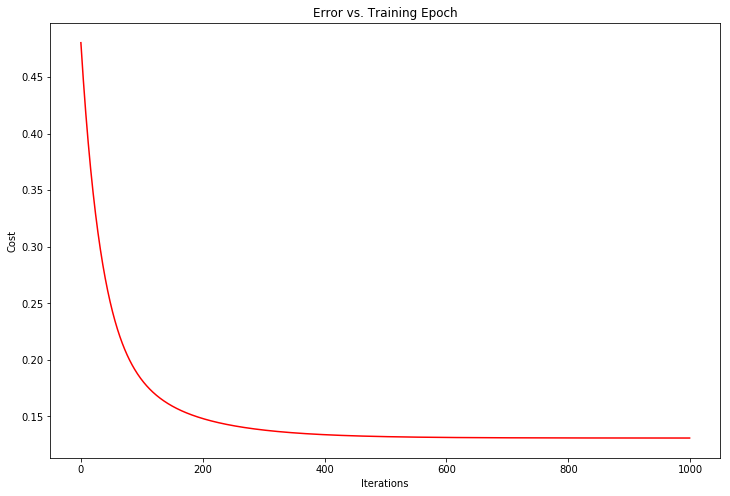

In [21]:
plt.show()

In [22]:
def costFunctionRidge(X, Y, beta,ridgeLambda):
    '''
    Compute the Least Square Cost Function.
    Return the calculated cost function.
    '''
    m, n = np.shape(X)
    #print (X.dot(beta)-Y) ** 2
    #print np.square(X.dot(ridgeLambda)-Y).shape
    #print (beta*ridgeLambda**2).shape
    costRidge=(np.sum(np.square(X.dot(beta)-Y.T)) ) / (2 * m)
    #+np.sum(beta*ridgeLambda**2)
    return costRidge

In [23]:
def gradientDescentRidge(X, Y, beta, alpha, itersreg, ridgeLambda):
    '''
    Compute the gradient descent function.
    Return beta and the cost array.
    '''
    costRidge = np.zeros(iters)
    m, n = np.shape(X)
    i=0
    #print "first " ,beta
    for i in range(iters):
        Err=np.dot(X, beta)-Y.T
        #print Err.shape
        j=0
        for j in range(n):
            tempBeta=beta[j]
            tempBeta=tempBeta-((alpha / m) * np.sum(np.dot(Err, X[:,j])))+ beta[j]*ridgeLambda/m
            beta[j]=tempBeta
        costRidge[i]=costFunction(X,Y,beta)
        
    return beta, costRidge

In [24]:
beta = np.zeros(n)
alphareg = 0.01 
itersreg = 1000
ridgeLambda=0.05
regResult = gradientDescentRidge(XMatrix, YMatrix, beta, alphareg, itersreg,ridgeLambda)

Define alpha, number of iterations and lambda of your choice that minimizes the cost function and use them to call to gradientDescent function. Plot the cost graph with iterations titled "Error vs training" with and without regularization(y axis labeled as cost and x axix labeled as iterations). Then, calculate the MSE.

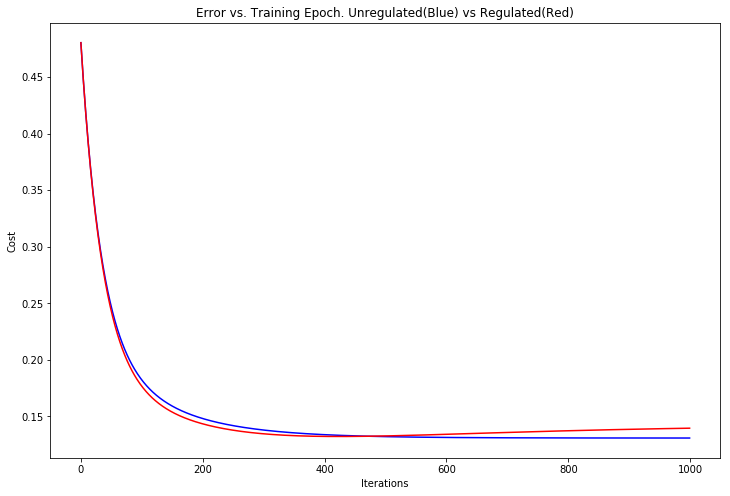

In [25]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iters), result[1], 'b') 
ax.plot(np.arange(iters), regResult[1], 'r')
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch. Unregulated(Blue) vs Regulated(Red)')
plt.show()

In [26]:
print(regResult[0])

[-1.11017964e-16  1.04556024e+00 -1.51690372e-01]


In [27]:
print("Final Beta :",beta)
print("MSE : " , 2*costFunction(XMatrix,YMatrix,beta))

Final Beta : [-1.11017964e-16  1.04556024e+00 -1.51690372e-01]
MSE :  0.2788132786032512
